In [1]:
pip install Faker

Note: you may need to restart the kernel to use updated packages.


In [25]:
from faker import Faker
import pandas as pd
import random
import seaborn as sns
from matplotlib import pyplot as plt
fake = Faker()

In [3]:
employees = pd.DataFrame()
salary = pd.DataFrame()
department = pd.DataFrame()

In [4]:
states = ['Connecticut','Delaware','Florida','Georgia','Maine','Maryland','Massachusetts','New Hampshire','New Jersey','New York','North Carolina','Rhode Island','South Carolina','Virginia']

employees['id'] = [i+1 for i in range(10000)]
employees['name'] = [fake.first_name() for i in range(10000)]
employees['lastname'] = [fake.last_name() for i in range(10000)]
employees['phone'] = [fake.phone_number() for i in range(10000)]
employees['state'] = [random.choice(states) for i in range(10000)]

salary['id'] = employees['id']
salary['departmentid'] = [random.randint(1,7) for i in range(10000)]
salary['annualsalary'] = [random.randint(50000,200000) for i in range(10000)]

department['id'] = [i+1 for i in range(7)]
department['name'] = [ 'Marketing', 'Finance', 'Operations management', 'Human Resource', 'IT', 'Sales', 'Production']

In [5]:
employees

,id,name,lastname,phone,state
0,1,Mary,James,040-054-0031,New Jersey
1,2,Dennis,Thompson,(183)547-1862x959,Maryland
2,3,Carrie,Johnson,+1-090-854-4612,Massachusetts
3,4,Karen,Holmes,(162)468-4256,Connecticut
4,5,Justin,Hall,001-295-022-7312x992,Virginia
...,...,...,...,...,...
9995,9996,Joshua,Richards,446.553.5238x4182,Rhode Island
9996,9997,Jeffrey,Ayers,(890)079-3803x2782,Maryland
9997,9998,Robert,Shannon,(417)285-2373x0674,Maryland
9998,9999,Rebecca,Bridges,888.161.7544x8902,Delaware


In [6]:
salary

,id,departmentid,annualsalary
0,1,4,108405
1,2,7,188383
2,3,5,129324
3,4,2,183441
4,5,3,90045
...,...,...,...
9995,9996,4,168045
9996,9997,2,190047
9997,9998,7,158084
9998,9999,4,116682


In [7]:
department

,id,name
0,1,Marketing
1,2,Finance
2,3,Operations management
3,4,Human Resource
4,5,IT
5,6,Sales
6,7,Production


<AxesSubplot:title={'center':'Average Salary for each Department'}, xlabel='Departments', ylabel='Salary'>

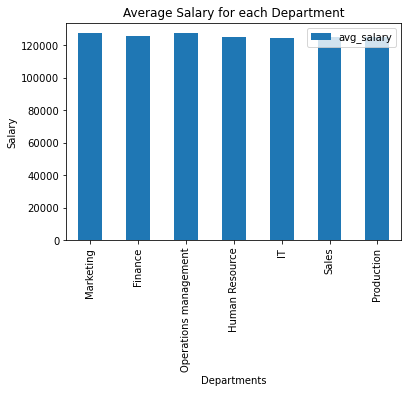

In [16]:
#Visualize the average salary of each department
avg_salary_depid = salary \
                .groupby('departmentid') \
                .agg(avg_salary = ('annualsalary', 'mean'))
avg_salary_dep = avg_salary_depid.merge(department, left_on='departmentid', right_on='id')
avg_salary_dep.plot.bar(x='name', y='avg_salary', title = 'Average Salary for each Department', xlabel = 'Departments', ylabel = 'Salary')

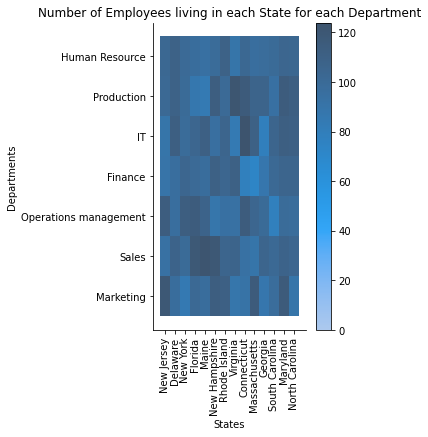

In [31]:
#Visualize the total number of employees living in each state for each department
agg_1 = employees.merge(salary, on= 'id')
agg_2 = agg_1.merge(department, left_on='departmentid', right_on='id', suffixes=['_emp','_dep'])

plot = sns.displot(agg_2, x="state", y="name_dep", cbar = True)
plot.ax.tick_params(axis = 'x', labelrotation = 90)
plot.ax.set_title("Number of Employees living in each State for each Department")
plot.set_xlabels('States')
plot.set_ylabels('Departments')

#the below dataframe is just to check the count.
no_of_employees = agg_2 \
                  .groupby(['state','name_dep']) \
                  .agg(no_of_employees = ('id_emp', 'count'))

[Text(0.5, 1.0, 'Virginia')]

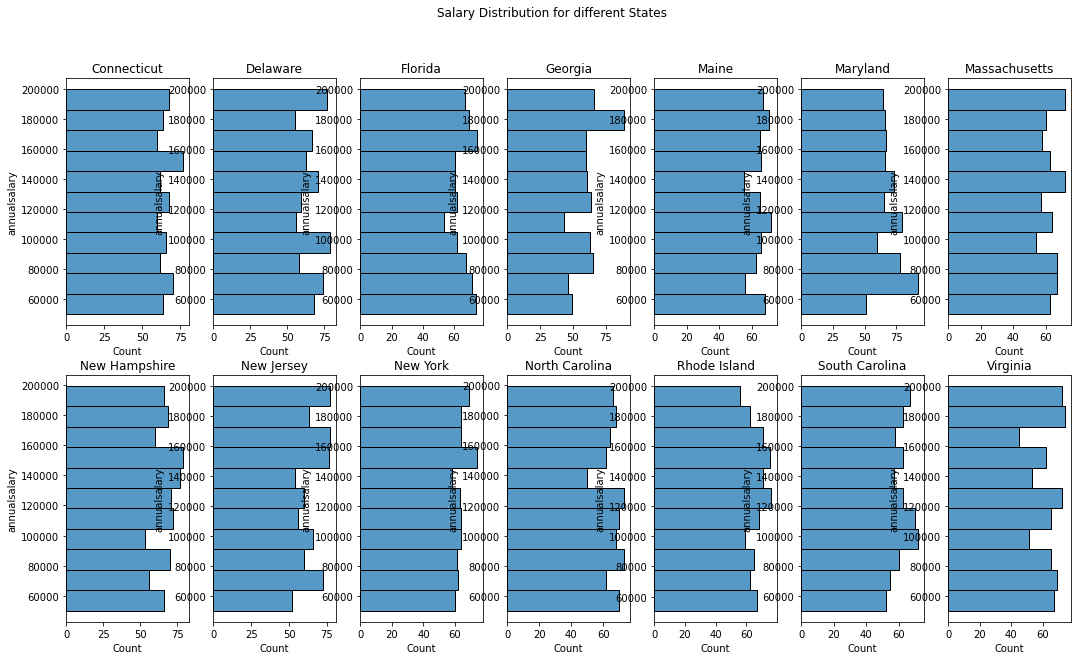

In [43]:
#Visualize salary distribution of different states
fig, axes = plt.subplots(2, 7, figsize=(18, 10))
fig.suptitle('Salary Distribution for different States')

ax = sns.histplot(ax=axes[0, 0], data=agg_2[agg_2['state'] == 'Connecticut'], y="annualsalary")
ax.set(title='Connecticut')
ax = sns.histplot(ax=axes[0, 1], data=agg_2[agg_2['state'] == 'Delaware'], y="annualsalary")
ax.set(title='Delaware')
ax = sns.histplot(ax=axes[0, 2], data=agg_2[agg_2['state'] == 'Florida'], y="annualsalary")
ax.set(title='Florida')
ax = sns.histplot(ax=axes[0, 3], data=agg_2[agg_2['state'] == 'Georgia'], y="annualsalary")
ax.set(title='Georgia')
ax = sns.histplot(ax=axes[0, 4], data=agg_2[agg_2['state'] == 'Maine'], y="annualsalary")
ax.set(title='Maine')
ax = sns.histplot(ax=axes[0, 5], data=agg_2[agg_2['state'] == 'Maryland'], y="annualsalary")
ax.set(title='Maryland')
ax = sns.histplot(ax=axes[0, 6], data=agg_2[agg_2['state'] == 'Massachusetts'], y="annualsalary")
ax.set(title='Massachusetts')
ax = sns.histplot(ax=axes[1, 0], data=agg_2[agg_2['state'] == 'New Hampshire'], y="annualsalary")
ax.set(title='New Hampshire')
ax = sns.histplot(ax=axes[1, 1], data=agg_2[agg_2['state'] == 'New Jersey'], y="annualsalary")
ax.set(title='New Jersey')
ax = sns.histplot(ax=axes[1, 2], data=agg_2[agg_2['state'] == 'New York'], y="annualsalary")
ax.set(title='New York')
ax = sns.histplot(ax=axes[1, 3], data=agg_2[agg_2['state'] == 'North Carolina'], y="annualsalary")
ax.set(title='North Carolina')
ax = sns.histplot(ax=axes[1, 4], data=agg_2[agg_2['state'] == 'Rhode Island'], y="annualsalary")
ax.set(title='Rhode Island')
ax = sns.histplot(ax=axes[1, 5], data=agg_2[agg_2['state'] == 'South Carolina'], y="annualsalary")
ax.set(title='South Carolina')
ax = sns.histplot(ax=axes[1, 6], data=agg_2[agg_2['state'] == 'Virginia'], y="annualsalary")
ax.set(title='Virginia')

[Text(0.5, 1.0, 'Production')]

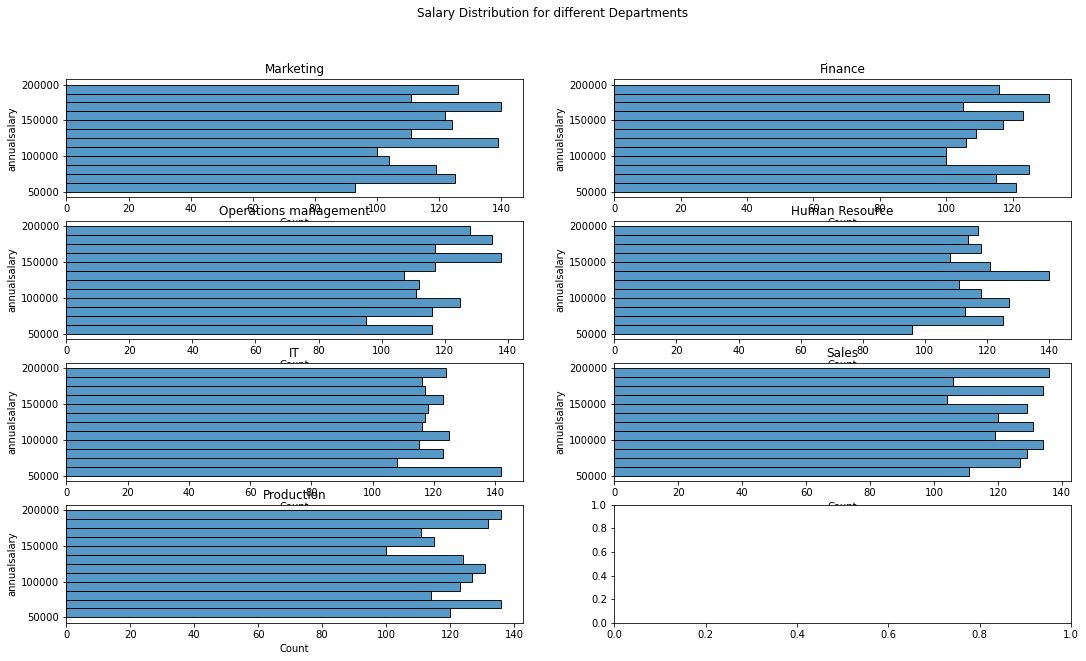

In [45]:
#Visualize salary distribution of different departments
fig, axes = plt.subplots(4, 2, figsize=(18, 10))
fig.suptitle('Salary Distribution for different Departments')

ax = sns.histplot(ax=axes[0, 0], data=agg_2[agg_2['name_dep'] == 'Marketing'], y="annualsalary")
ax.set(title='Marketing')
ax = sns.histplot(ax=axes[0, 1], data=agg_2[agg_2['name_dep'] == 'Finance'], y="annualsalary")
ax.set(title='Finance')
ax = sns.histplot(ax=axes[1, 0], data=agg_2[agg_2['name_dep'] == 'Operations management'], y="annualsalary")
ax.set(title='Operations management')
ax = sns.histplot(ax=axes[1, 1], data=agg_2[agg_2['name_dep'] == 'Human Resource'], y="annualsalary")
ax.set(title='Human Resource')
ax = sns.histplot(ax=axes[2, 0], data=agg_2[agg_2['name_dep'] == 'IT'], y="annualsalary")
ax.set(title='IT')
ax = sns.histplot(ax=axes[2, 1], data=agg_2[agg_2['name_dep'] == 'Sales'], y="annualsalary")
ax.set(title='Sales')
ax = sns.histplot(ax=axes[3, 0], data=agg_2[agg_2['name_dep'] == 'Production'], y="annualsalary")
ax.set(title='Production')